In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

C:\Users\86131\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\86131\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\86131\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train=train.drop(columns='Unnamed: 0')

In [4]:
test=test.drop(columns='Unnamed: 0')

In [5]:
train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,label
0,0.177807,-0.435464,0.173244,-0.339036,-0.036491,1.074802,0.181631,1.069594,0.34859,0.698654,-0.144749,-0.21852,0.851632,0.130109,0
1,-0.993245,0.721903,0.018238,1.084470,1.130745,-1.020020,-0.072637,-1.178617,0.34859,0.698654,-0.144749,-0.21852,-1.254868,0.130109,0
2,-0.993245,-0.435464,-0.092370,-0.515375,-0.425570,-1.020020,-0.815525,-0.918867,-2.73900,-1.431324,-0.144749,-0.21852,-0.039580,0.130109,0
3,1.056095,-0.435464,-0.631948,-0.515375,-0.425570,-0.857808,-0.881218,-0.710149,0.34859,-1.431324,-0.144749,-0.21852,-0.039580,0.130109,0
4,-1.066435,-0.435464,-0.639694,1.084470,1.130745,-1.020020,-0.926234,-1.178617,0.34859,-1.431324,-0.144749,-0.21852,-0.039580,0.130109,0


In [6]:
train.describe()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,label
count,2.604800e+04,2.604800e+04,2.604800e+04,2.604800e+04,2.604800e+04,2.604800e+04,2.604800e+04,2.604800e+04,2.604800e+04,2.604800e+04,2.604800e+04,2.604800e+04,2.604800e+04,2.604800e+04,26048.000000
mean,1.295004e-16,-3.070120e-16,-6.171481e-17,3.692063e-16,-4.383182e-16,-1.282076e-16,-1.017285e-16,1.548550e-16,1.315909e-15,-3.384117e-16,1.354470e-15,-1.780713e-16,-3.453309e-16,5.280038e-16,0.241631
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,0.428080
min,-1.578770e+00,-1.027532e+00,-1.678676e+00,-1.306666e+00,-3.538198e+00,-1.020020e+00,-1.744532e+00,-1.178617e+00,-3.348431e+00,-1.431324e+00,-1.447490e-01,-2.185203e-01,-3.199330e+00,-5.159177e+00,0.000000
25%,-7.736726e-01,-4.354644e-01,-6.821371e-01,-5.153752e-01,-4.255696e-01,-1.020020e+00,-8.155254e-01,-9.188668e-01,3.485895e-01,-1.431324e+00,-1.447490e-01,-2.185203e-01,-3.957962e-02,1.301094e-01,0.000000
50%,-1.149562e-01,-4.354644e-01,-1.055524e-01,-3.390355e-01,-3.649105e-02,-7.044889e-01,-7.263664e-02,-7.101485e-01,3.485895e-01,6.986537e-01,-1.447490e-01,-2.185203e-01,-3.957962e-02,1.301094e-01,0.000000
75%,6.901416e-01,-4.354644e-01,4.499384e-01,1.126117e-01,7.416661e-01,1.074802e+00,7.566055e-01,1.069594e+00,3.485895e-01,6.986537e-01,-1.447490e-01,-2.185203e-01,3.655166e-01,1.301094e-01,0.000000
max,3.764151e+00,4.427665e+00,1.223039e+01,3.183467e+00,2.297980e+00,1.074802e+00,1.804826e+00,1.195407e+00,5.896447e-01,6.986537e-01,1.325556e+01,1.050263e+01,4.740556e+00,5.074961e+00,1.000000


在adult数据集中，关于受教育程度的有两个变量，一个是education（教育水平），另一个是education-num（受教育时长），而且这两个变量的值都是一一对应的，只不过一个是字符型，另一个是对应的数值型。如果将这两个变量都包含在模型中的话，就会产生信息的冗余,故删去education；fnlwgt变量代表的是一种序号，其对收入水平的高低并没有实际意义。同理删去capital-gain，capital-loss这两列属性,因为75%以上的人没有资本收益和资本输出，因此属于无关变量


In [7]:
train=train.drop(columns=['education','fnlwgt','capital.gain','capital.loss'])
test=test.drop(columns=['education','fnlwgt','capital.gain','capital.loss'])

In [8]:
train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,label
0,0.177807,-0.435464,-0.036491,1.074802,0.181631,1.069594,0.34859,0.698654,0.851632,0.130109,0
1,-0.993245,0.721903,1.130745,-1.020020,-0.072637,-1.178617,0.34859,0.698654,-1.254868,0.130109,0
2,-0.993245,-0.435464,-0.425570,-1.020020,-0.815525,-0.918867,-2.73900,-1.431324,-0.039580,0.130109,0
3,1.056095,-0.435464,-0.425570,-0.857808,-0.881218,-0.710149,0.34859,-1.431324,-0.039580,0.130109,0
4,-1.066435,-0.435464,1.130745,-1.020020,-0.926234,-1.178617,0.34859,-1.431324,-0.039580,0.130109,0


In [9]:
df=pd.concat([train,test],axis=0)

In [10]:
df.shape

(32561, 11)

In [11]:
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,label
0,0.177807,-0.435464,-0.036491,1.074802,0.181631,1.069594,0.34859,0.698654,0.851632,0.130109,0
1,-0.993245,0.721903,1.130745,-1.020020,-0.072637,-1.178617,0.34859,0.698654,-1.254868,0.130109,0
2,-0.993245,-0.435464,-0.425570,-1.020020,-0.815525,-0.918867,-2.73900,-1.431324,-0.039580,0.130109,0
3,1.056095,-0.435464,-0.425570,-0.857808,-0.881218,-0.710149,0.34859,-1.431324,-0.039580,0.130109,0
4,-1.066435,-0.435464,1.130745,-1.020020,-0.926234,-1.178617,0.34859,-1.431324,-0.039580,0.130109,0


In [12]:
y_train = train['label']
X_train = train.drop(['label'], axis=1)

In [13]:
X_test=test.drop(['label'],axis=1)
y_test=test['label']

In [14]:
X=df.drop(['label'],axis=1)
y=df['label']

In [15]:
# 变量选择
model = RandomForestClassifier()
model.fit(X, y)
feat_importances = model.feature_importances_
indices = np.argsort(feat_importances)[::-1]
selected_features = []
for i in range(X.shape[1]):
    if feat_importances[indices[i]] > 0.1:
        selected_features.append(indices[i])
    else:
        break
print("Selected features:", selected_features)


Selected features: [0, 2, 8, 5, 4]


经过随机森林模型进行变量重要性评估，筛选出重要性大于0.1的变量，为：年龄，教育时长，职业，关系，每周工时。为了模型的简洁，剔除无关变量或对收入影响很小的变量，在下面的建模过程中针对上述五个变量进行建模。从常理来判断，上述五个变量应该对收入的影响较大，而婚姻，种族，性别，国籍等不是起决定性因素的变量。

In [19]:
X_train=X_train[['age','education.num','occupation','relationship','hours.per.week']]
X_test=X_test[['age','education.num','occupation','relationship','hours.per.week']]

# 1. Logistic Regression

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [28]:
# 逻辑回归模型
lr = LogisticRegression()
# 设置需要网格搜索的参数
params = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0],
    'max_iter': [30, 50, 70, 100],
    'solver': ['lfgbs', 'sag', 'liblinear', 'newton-cg', 'saga']
}

# 创建网格搜索对象
gscv = GridSearchCV(lr, params)

# 训练
gscv.fit(X_train, y_train)

# 查看最优参数
gscv.best_params_ 


{'C': 0.5, 'max_iter': 30, 'penalty': 'l1', 'solver': 'liblinear'}

label     0    1
row_0           
0      4591  770
1       375  777
模型在训练集上的准确率为0.829238
模型在测试集上的准确率为0.824198


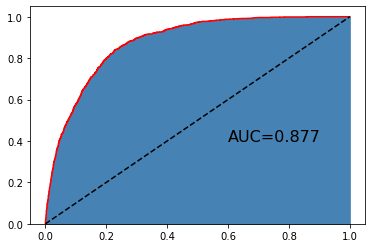

In [29]:
# 使用最佳参数重新创建实例化对象
lr = LogisticRegression(C=0.5, max_iter=30, penalty='l1', solver='liblinear')

# 训练
lr.fit(X_train, y_train)

# 打分
lr.score(X_test, y_test)
lr_pred = lr.predict(X_test)
print(pd.crosstab(lr_pred, y_test))

# 模型得分
print("模型在训练集上的准确率为%f" % lr.score(X_train, y_train))
print("模型在测试集上的准确率为%f" % lr.score(X_test, y_test))



# 计算ROC曲线的x轴 和 y轴数据
fpr, tpr, _ = metrics.roc_curve(y_test, lr.predict_proba(X_test)[:,1])
# 绘制ROC曲线
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
# 添加阴影
plt.stackplot(fpr, tpr, color='steelblue')
# 绘制参考线
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
# 添加文本
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()


混淆矩阵如上所示,经网格搜索，寻找最优参数后，逻辑回归模型在训练集和测试集上取得了82%左右的正确率。第一部分是混淆矩阵，矩阵中的行是模型的预测值，矩阵中的列是测试集的实际值，主对角线就是模型预测正确的数量（income <=50K有4593人 和 income >50K 有 772人），373和775就是模型预测错误的数量

# 2.KNN

In [30]:
# 构件KNN模型
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
# 打分
KNN.score(X_test, y_test)
KNN_pred = KNN.predict(X_test)
print(pd.crosstab(KNN_pred, y_test))

# 模型得分
print("模型在训练集上的准确率为%f" % KNN.score(X_train, y_train))
print("模型在测试集上的准确率为%f" % KNN.score(X_test, y_test))


label     0    1
row_0           
0      4441  701
1       525  846
模型在训练集上的准确率为0.864097
模型在测试集上的准确率为0.811761


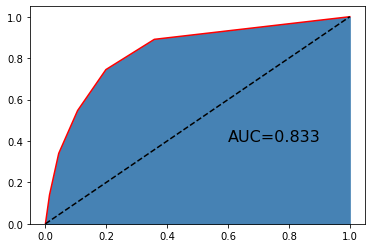

In [31]:
fpr, tpr, _ = metrics.roc_curve(y_test, KNN.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
plt.stackplot(fpr, tpr, color='steelblue')
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()

可以看到，KNN在训练集上准确率为87%,测试集准确率为81%,有点过拟合，下面通过模型网格搜索最优参数

In [32]:
# 选择不同的参数
k_options = list(range(1,12))
parameters = {'n_neighbors':k_options}
# 搜索不同的K值
grid_kn = GridSearchCV(estimator= KNeighborsClassifier(), param_grid=parameters, cv=10, scoring='accuracy')
grid_kn.fit(X_train, y_train)
# 结果输出
grid_kn.cv_results_, grid_kn.best_params_, grid_kn.best_score_


({'mean_fit_time': array([0.02257147, 0.02074368, 0.0221349 , 0.02655869, 0.02499471,
         0.02406621, 0.01698956, 0.02343235, 0.02342231, 0.02578998,
         0.02499449]),
  'std_fit_time': array([0.00979103, 0.00377168, 0.00527721, 0.00715986, 0.00765306,
         0.00739634, 0.00527508, 0.0078105 , 0.00779795, 0.00861351,
         0.00765259]),
  'mean_score_time': array([0.11263134, 0.08091354, 0.08260677, 0.07966843, 0.09376645,
         0.08841493, 0.09661052, 0.09377775, 0.09528844, 0.09395373,
         0.09685178]),
  'std_score_time': array([0.08888434, 0.0034863 , 0.00693299, 0.00468639, 0.00981849,
         0.00877889, 0.00468339, 0.00698769, 0.0084125 , 0.0070188 ,
         0.00624868]),
  'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_neighbors': 1},
 

经过10重交叉验证，得到11种K值下的平均准确率。最佳K值为10，最佳平均准确率为82%

label     0    1
row_0           
0      4577  776
1       389  771
模型在训练集上的准确率为0.851543
模型在测试集上的准确率为0.821127


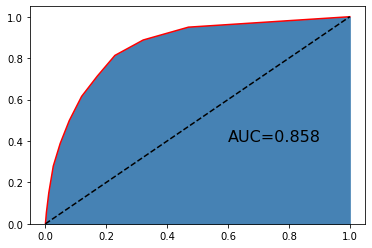

In [33]:
grid_kn_pred = grid_kn.predict(X_test)
print(pd.crosstab(grid_kn_pred, y_test))

# 模型得分
print("模型在训练集上的准确率为%f" % grid_kn.score(X_train, y_train))
print("模型在测试集上的准确率为%f" % grid_kn.score(X_test, y_test))

fpr, tpr, _ = metrics.roc_curve(y_test, grid_kn.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
plt.stackplot(fpr, tpr, color='steelblue')
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()


经网格化搜索最优参数后，KNN在训练集上准确率为85%，测试集准确率为82%。过拟合现象得到了一定的缓解。AUC较之前有提升，说明优化后的模型拟合效果更好。

# 3. DecisionTree

In [34]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor, export_graphviz
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree


In [35]:
params = {'max_depth' : range(1, 20)}
best_clf = GridSearchCV(DecisionTreeClassifier(criterion = 'entropy', random_state = 20), param_grid = params)
best_clf = best_clf.fit(X_train, y_train)
print(best_clf.best_params_)


{'max_depth': 8}


使用GridSearchCV寻找最优参数，以熵为决策基准，结果最优决策深度为8

In [36]:
# 决策树模型
model= DecisionTreeClassifier(criterion="entropy",max_depth=8,min_samples_split=5)#决策深度设为8，分裂节点所需样本数至少为5
clf_model=model.fit(X_train, y_train)
predict_train_clf = clf_model.predict(X_train)
predict_test_clf = clf_model.predict(X_test)
my_feature_name=['age','workclass','fnlwgt','education','education.num','martial.status','occupation','relationship','race','sex','captial.gain'
             ,'captial.loss','hours.per.week','native.country']
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_clf))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_clf))
print('参数权重：',[*zip(my_feature_name,clf_model.feature_importances_)])
cm_clf = confusion_matrix(y_test, predict_test_clf)
print("Confusion Matrix of Decision Tree:")
print(cm_clf)

Training Accuracy: 0.8420608108108109
Validation Accuracy: 0.836480884385076
参数权重： [('age', 0.10669548513533027), ('workclass', 0.2562567235736264), ('fnlwgt', 0.06319224538019153), ('education', 0.4971600320274608), ('education.num', 0.07669551388339098)]
Confusion Matrix of Decision Tree:
[[4635  331]
 [ 734  813]]


[Text(0.4963753918495298, 0.9444444444444444, 'martial.status <= 0.18\nentropy = 0.798\nsamples = 26048\nvalue = [19754, 6294]\nclass = 低于50K'),
 Text(0.24882445141065831, 0.8333333333333334, 'fnlwgt <= 0.936\nentropy = 0.349\nsamples = 14205\nvalue = [13276, 929]\nclass = 低于50K'),
 Text(0.14028213166144202, 0.7222222222222222, 'race <= 0.001\nentropy = 0.209\nsamples = 11294\nvalue = [10921, 373]\nclass = 低于50K'),
 Text(0.07053291536050156, 0.6111111111111112, 'age <= -0.444\nentropy = 0.14\nsamples = 9231\nvalue = [9049, 182]\nclass = 低于50K'),
 Text(0.032915360501567396, 0.5, 'age <= -1.249\nentropy = 0.047\nsamples = 5247\nvalue = [5220, 27]\nclass = 低于50K'),
 Text(0.01567398119122257, 0.3888888888888889, 'education <= 0.185\nentropy = 0.01\nsamples = 2238\nvalue = [2236, 2]\nclass = 低于50K'),
 Text(0.009404388714733543, 0.2777777777777778, 'occupation <= -1.195\nentropy = 0.006\nsamples = 2223\nvalue = [2222, 1]\nclass = 低于50K'),
 Text(0.006269592476489028, 0.16666666666666666, 'mar

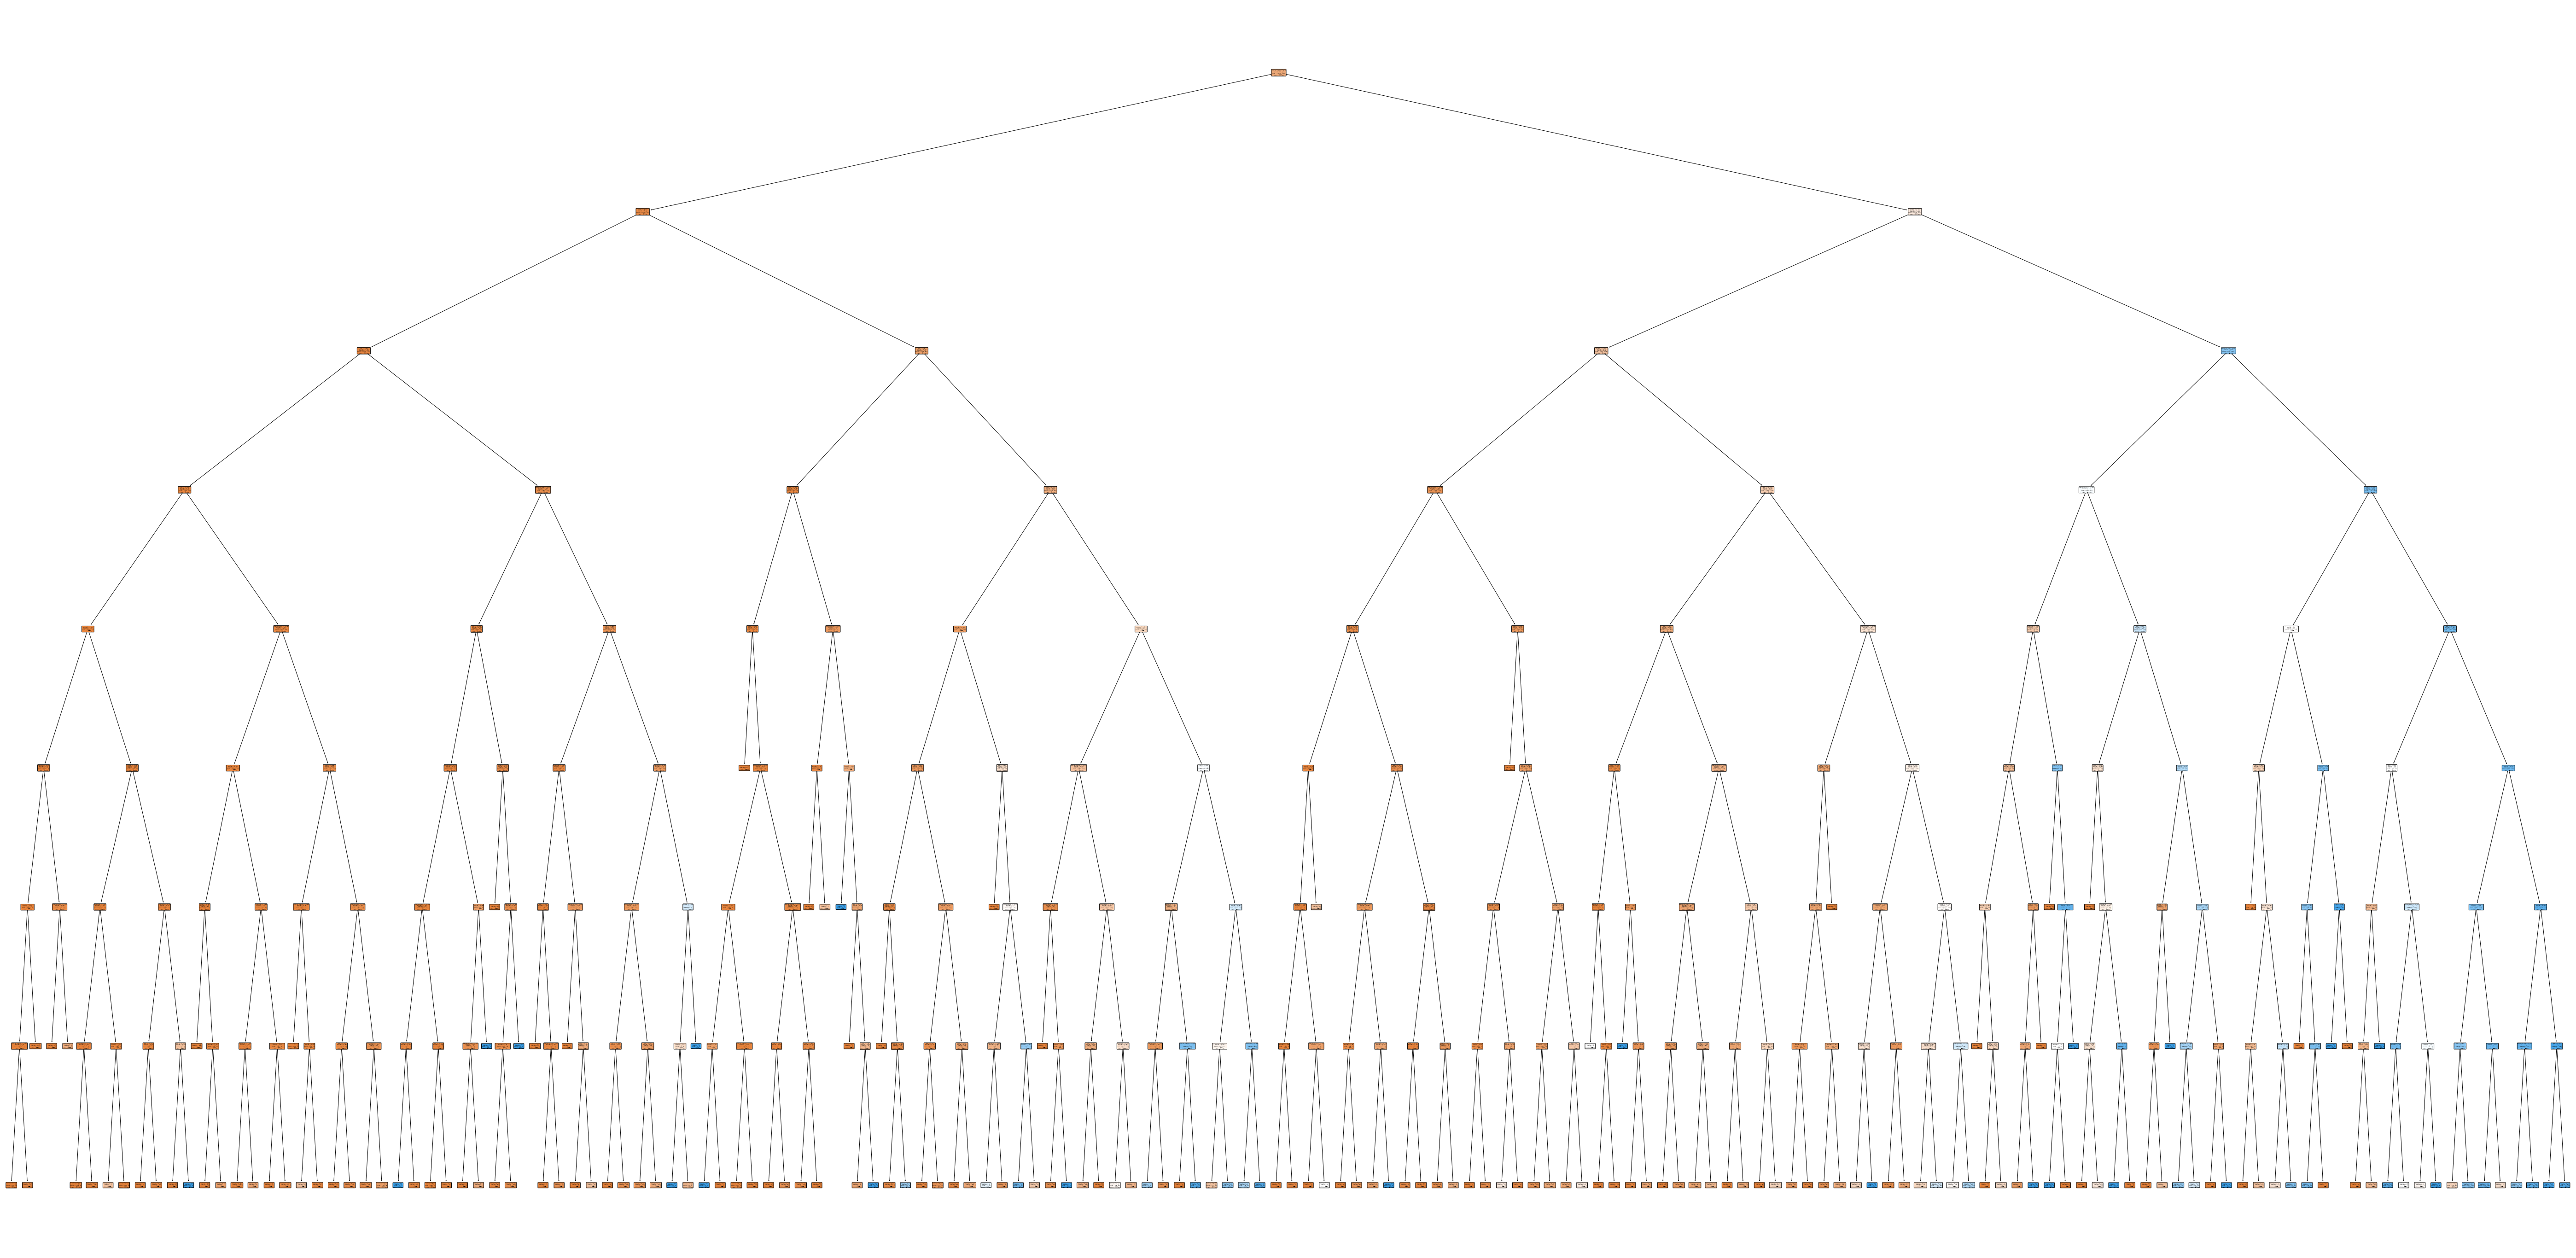

In [23]:
# 画出决策树
plt.rcParams['font.sans-serif']='SimHei'
target_names=['低于50K','高于50K']
fig,ax = plt.subplots()
fig.set_size_inches(100,50)
plot_tree(model, 
          feature_names = my_feature_name, 
          class_names = target_names,
          filled = True, 
          rounded = True)


决策树最终得到了84%左右的准确率

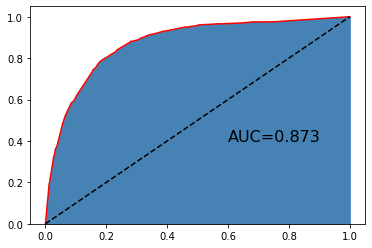

In [37]:
fpr, tpr, _ = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
plt.stackplot(fpr, tpr, color='steelblue')
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()


# 4. SVM

In [38]:
svm= SVC(kernel = 'linear',probability=True)
svm = svm.fit(X_train, y_train)
# 模型得分
print("模型在训练集上的准确率为%f" % svm.score(X_train, y_train))
print("模型在测试集上的准确率为%f" % svm.score(X_test, y_test))

模型在训练集上的准确率为0.829430
模型在测试集上的准确率为0.824044


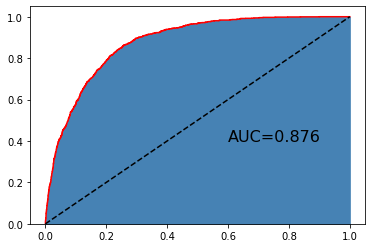

In [39]:
fpr, tpr, _ = metrics.roc_curve(y_test, svm.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
plt.stackplot(fpr, tpr, color='steelblue')
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()

SVM得到了近83%的准确率。AUC为0.876

# 5. RandomForest

In [40]:
rf = RandomForestClassifier(n_estimators = 100)
rf = rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)
# 模型得分
print("模型在训练集上的准确率为%f" % rf.score(X_train, y_train))
print("模型在测试集上的准确率为%f" % rf.score(X_test, y_test))


模型在训练集上的准确率为0.940955
模型在测试集上的准确率为0.808383


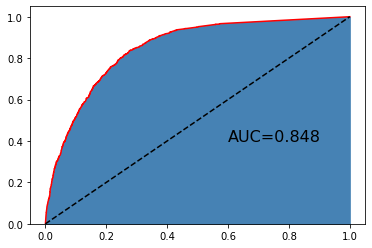

In [41]:
fpr, tpr, _ = metrics.roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
plt.stackplot(fpr, tpr, color='steelblue')
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()

随机森林在训练集上准确率很高，但是有些过拟合

In [42]:
rfr_best = RandomForestClassifier()
params ={'n_estimators':range(50,200,5)}
gs = GridSearchCV(rfr_best, params, cv=5)
gs.fit(X_train,y_train)
 
#查验优化后的超参数配置
print(gs.best_score_)
print(gs.best_params_)


0.8106186509470357
{'n_estimators': 70}


In [45]:
rf_best = RandomForestClassifier(n_estimators = 70,max_depth=10,min_samples_split=5,criterion='entropy')
rf_best = rf_best.fit(X_train, y_train)
score = rf_best.score(X_test, y_test)
# 模型得分
print("模型在训练集上的准确率为%f" % rf_best.score(X_train, y_train))
print("模型在测试集上的准确率为%f" % rf_best.score(X_test, y_test))


模型在训练集上的准确率为0.852196
模型在测试集上的准确率为0.838170


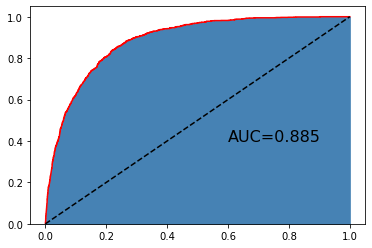

In [46]:
fpr, tpr, _ = metrics.roc_curve(y_test, rf_best.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
plt.stackplot(fpr, tpr, color='steelblue')
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()

调参后，随机森林的过拟合现象得到了解决。准确率为84%左右。AUC为0.89，比较高，说明随机森林模型分类的稳定性较好

# 6.Adaboost

In [47]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
acc_ada = accuracy_score(y_test, y_pred_ada)
cm_ada = confusion_matrix(y_test, y_pred_ada)
print("Confusion Matrix of AdaBoost:")
print(cm_ada)
print("模型在训练集上的准确率为%f" % ada.score(X_train, y_train))
print("模型在测试集上的准确率为%f" % ada.score(X_test, y_test))


Confusion Matrix of AdaBoost:
[[4598  368]
 [ 715  832]]
模型在训练集上的准确率为0.836456
模型在测试集上的准确率为0.833717


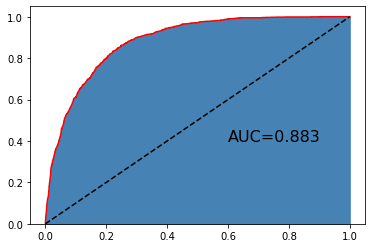

In [48]:
fpr, tpr, _ = metrics.roc_curve(y_test, ada.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
plt.stackplot(fpr, tpr, color='steelblue')
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()

Adaboost模型的准确率为83%左右

# 7.GBDT

label     0    1
row_0           
0      4594  687
1       372  860
模型在训练集上的准确率为0.843788
模型在测试集上的准确率为0.837402


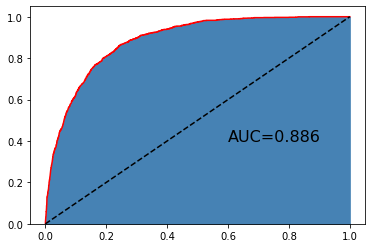

In [49]:
gbdt = GradientBoostingClassifier()
gbdt.fit(X_train,y_train)
gbdt_pred = gbdt.predict(X_test)
print(pd.crosstab(gbdt_pred, y_test))

# 模型得分
print("模型在训练集上的准确率为%f" % gbdt.score(X_train, y_train))
print("模型在测试集上的准确率为%f" % gbdt.score(X_test, y_test))

fpr, tpr, _ = metrics.roc_curve(y_test, gbdt.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
plt.stackplot(fpr, tpr, color='steelblue')
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()


GBDT的准确率为84%左右。AUC较高

# 8.Naive-Bayes

label     0    1
row_0           
0      4426  576
1       540  971
模型在训练集上的准确率为0.829392
模型在测试集上的准确率为0.828650


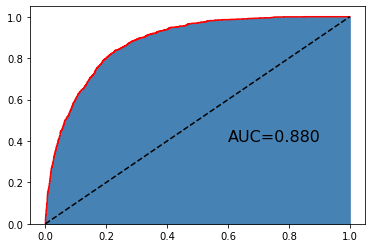

In [50]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
acc_nb = accuracy_score(y_test, nb_pred)
cm_nb = confusion_matrix(y_test, nb_pred)
print(pd.crosstab(nb_pred, y_test))

# 模型得分
print("模型在训练集上的准确率为%f" % nb.score(X_train, y_train))
print("模型在测试集上的准确率为%f" % nb.score(X_test, y_test))

fpr, tpr, _ = metrics.roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
plt.stackplot(fpr, tpr, color='steelblue')
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()

朴素贝叶斯分类准确度最差，为76%,经参数选择后达到了83%左右

# 总结

## 表一：参数选择前的准确率比较

|模型|训练集准确率|测试集准确率|AUC|
|:---|:---|:---|:---|
|逻辑回归|82.9%|82.4%|0.878|
|KNN|85.5%|82.4%|0.860|
|决策树|84.3%|83.4%|0.877|
|SVM|82.9%|82.4%|0.877|
|随机森林|85.5%|84.2%|0.890|
|Adaboost|83.9%|83.7%|0.885|
|GBDT|84.7%|84.0%|0.889|
|朴素贝叶斯|76.1%|76.1%|0.849|



分类效果较好的是随机森林和GBDT，分类效果最差的是朴素贝叶斯。各个模型总体分类精度没有太大差别，但均没有超过90%。正确率并不是很高的原因可能有：
1、模型的鲁棒性不够。
2、数据集存在大量的离散类型数据，在经过TargetEncoder之后，数据高度稀疏。
解决方法：
1、对模型再进行搜索性地调参，可以考虑增加模型复杂度，过程中需要注意过拟合。
2、使用PCA主成分分析对数据进行降维


## 表二：参数选择后的准确率比较

|模型|训练集准确率|测试集准确率|AUC|
|:---|:---|:---|:---|
|逻辑回归|82.9%|82.4%|0.877|
|KNN|85.1%|82.1%|0.858|
|决策树|84.2%|83.6%|0.873|
|SVM|82.9%|82.4%|0.876|
|随机森林|85.2%|83.8%|0.885|
|Adaboost|83.6%|83.3%|0.883|
|GBDT|84.4%|83.7%|0.886|
|朴素贝叶斯|82.9%|82.9%|0.880|

朴素贝叶斯的准确率提升很大，其他模型提升不大